<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualisation-rapide" data-toc-modified-id="Visualisation-rapide-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualisation rapide</a></span></li><li><span><a href="#Exercice-1-:-Modèle-de-référence" data-toc-modified-id="Exercice-1-:-Modèle-de-référence-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercice 1 : Modèle de référence</a></span><ul class="toc-item"><li><span><a href="#Exercice-1.1" data-toc-modified-id="Exercice-1.1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercice 1.1</a></span></li><li><span><a href="#Exercice-1.2" data-toc-modified-id="Exercice-1.2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exercice 1.2</a></span></li><li><span><a href="#Exercice-1.3" data-toc-modified-id="Exercice-1.3-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exercice 1.3</a></span></li></ul></li><li><span><a href="#Exercice-2-:-Régularisation" data-toc-modified-id="Exercice-2-:-Régularisation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercice 2 : Régularisation</a></span><ul class="toc-item"><li><span><a href="#Exercice-2.1" data-toc-modified-id="Exercice-2.1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exercice 2.1</a></span></li><li><span><a href="#Exercice-2.2" data-toc-modified-id="Exercice-2.2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exercice 2.2</a></span></li><li><span><a href="#Exercice-2.3" data-toc-modified-id="Exercice-2.3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Exercice 2.3</a></span></li></ul></li><li><span><a href="#Exercice-3-:-Visualisation-des-coefficients" data-toc-modified-id="Exercice-3-:-Visualisation-des-coefficients-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercice 3 : Visualisation des coefficients</a></span><ul class="toc-item"><li><span><a href="#Exercice-3.1" data-toc-modified-id="Exercice-3.1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exercice 3.1</a></span></li><li><span><a href="#Exercice-3.2" data-toc-modified-id="Exercice-3.2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exercice 3.2</a></span></li></ul></li></ul></div>

# Lab 3: Régression Linéaire

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Nitrogen-dioxide-2D-dimensions-vector.svg/1200px-Nitrogen-dioxide-2D-dimensions-vector.svg.png)

Le [NO2 dataset](https://www.openml.org/d/547) contient 500 mesures de la pollution causée par les voitures. L'objectif est de prédire la concentration de $NO_2$ à partir de données sur le trafic et les conditions atmosphériques. Les variables prédictives comprennent le nombre de voitures par heure, la température, le vent et l'heure de la journée.

In [ ]:
!pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.6 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158702 sha256=5377392f86ee103f8a72826a9d9f37f64bd7a7aefa45c3bc4b68e88b26eb1cbc
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=d7274ce4459c242e15de6d43ce5c0fe0dfbd158eda64abdf98b2e9530c2ef94d
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [ ]:

# General imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download NO2 data. Takes a while the first time.
no2 = oml.datasets.get_dataset(547)
X, y, _, _ = no2.get_data(target=no2.default_target_attribute);
attribute_names = list(X)

<ipython-input-5-00f3b1290933>:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  no2 = oml.datasets.get_dataset(547)


In [ ]:
attribute_names

['cars_per_hour',
 'temperature_at_2m',
 'wind_speed',
 'temperature_diff_2m_25m',
 'wind_direction',
 'hour_of_day',
 'day']

## Visualisation rapide
Nous pouvons utiliser pandas pour visualiser rapidement les données. Si vous ne connaissez pas encore pandas, prenez le temps de comprendre le code.

Nous allons supprimer la fonction "jour" pour nous concentrer sur les aspects non temporels de cette interaction. Nous ne cherchons pas à prédire les niveaux futurs, et même si nous le faisions, cela nécessiterait un traitement spécial (par exemple, des séparations formation-test différentes). Il ne semble pas non plus y avoir de tendance à long terme dans les données, même s'il existe des tendances périodiques claires dans la température.

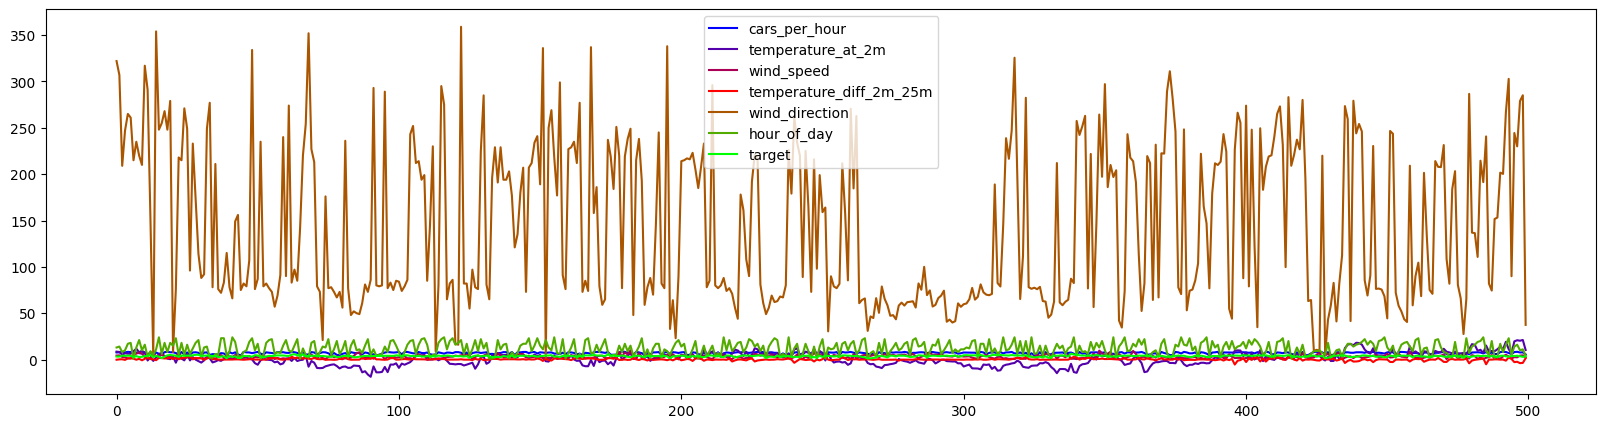

In [ ]:
df = pd.DataFrame(X, columns=attribute_names).join(pd.DataFrame(list(y),columns=['target']))
df = df.sort_values(['day','hour_of_day']).drop('day',axis=1)
df.plot(use_index=False,figsize=(20,5),cmap=plt.get_cmap('brg'));
X = X.drop('day',axis=1)

Si nous traçons les données, classées par heure de mesure, nous pouvons voir que la direction du vent (mesurée en degrés angulaires) est mise à l'échelle très différemment des autres caractéristiques. Zoomons maintenant sur les autres mesures :

In [ ]:
df.head()

,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,wind_direction,hour_of_day,target
42,7.64300,8.5,4.3,-0.2,322.0,13,3.22287
20,7.75061,8.2,4.5,0.2,307.0,14,3.15274
255,8.12415,5.2,2.8,0.3,209.0,8,4.19570
488,7.64108,6.7,2.3,-0.4,247.0,10,3.98155
94,8.31630,6.3,1.2,1.3,265.0,17,4.14155


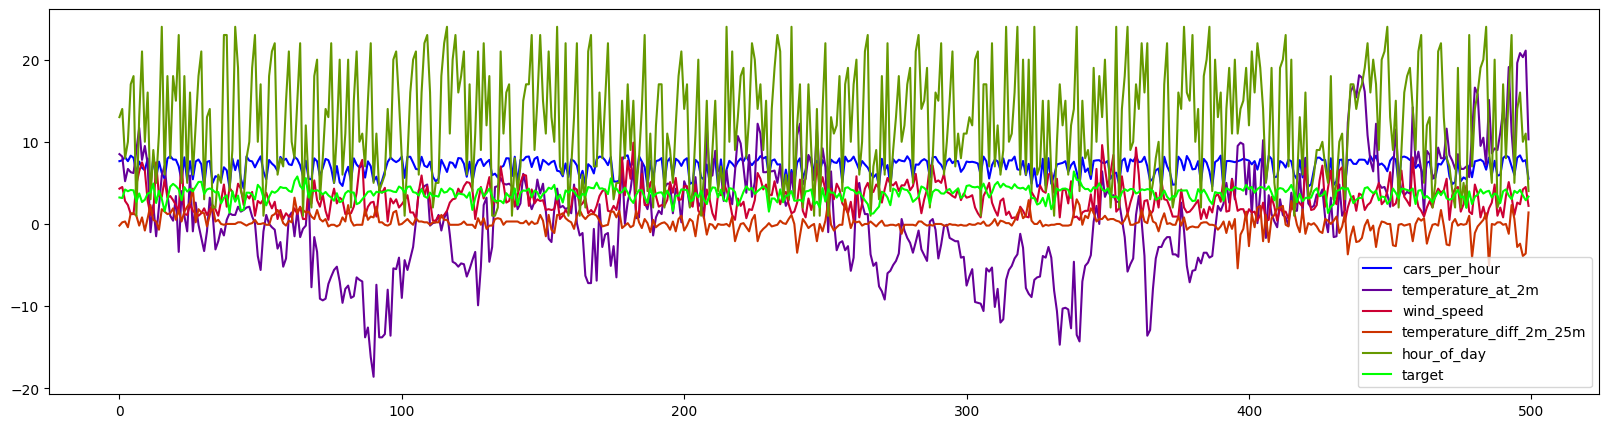

In [ ]:
df.drop('wind_direction',axis=1).plot(use_index=False,figsize=(20,5),cmap=plt.get_cmap('brg'));


Nous pouvons constater que l'objectif (niveaux de $NO_2$) semble être corrélé au nombre de voitures par heure, ce qui est logique puisque les voitures produisent du $NO_2$. D'autres influences (différences de température de l'air et vent) semblent avoir un effet plus complexe et plus subtil. Essayons de les modéliser à l'aide de modèles de régression linéaire.

## Exercice 1 : Modèle de référence
Il est clair que les concentrations de $NO_2$ dépendent d'une combinaison de ces caractéristiques, nous allons donc maintenant essayer d'apprendre cette relation complexe. Nous évaluons d'abord une série de problèmes de régression linéaire, à savoir la régression linéaire, Ridge, Lasso et ElasticNet, ainsi que kNN. Comme nous avons observé que certaines caractéristiques ont des échelles très différentes, nous construirons également des pipelines de toutes ces mesures avec une étape supplémentaire de mise à l'échelle. Pour l'instant, nous nous en tiendrons aux paramètres hyperparamétriques par défaut.

### Exercice 1.1
Implémentez une fonction ci-dessous qui évalue chaque classificateur qui lui est passé sur les données données données, et qui renvoie les scores de formation et de test de chaque classificateur sous forme de liste. Vous êtes autorisé à importer des fonctions supplémentaires à partir de n'importe quel module, mais vous devriez être capable de compléter la fonction avec la fonction [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) et les composants standards de Python. Vous trouverez ci-dessous un exemple de sortie de la fonction.
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X = df.drop(columns=['target'])
y = df['target']

#Define the classifiers(models) to evaluate
classifiers = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        ElasticNet(),
        KNeighborsRegressor()
    ]

In [ ]:
def evaluate_learners(models, X, y):
    train_scores = []
    test_scores = []

    for model in models:
        model_name = model.__class__.__name__
        cv_scores = cross_validate(model, X, y, return_train_score=True)
        train_score = [round(score, 2) for score in cv_scores['train_score']]
        test_score = [round(score, 2) for score in cv_scores['test_score']]
        train_scores.append((model_name, train_score))
        test_scores.append((model_name, test_score))

    return{'Train Scores': train_scores, 'Test Scores': test_scores}

In [ ]:
#def evaluate_learners(models, X, y):
  #  """
  #  Given a list of models [model1, model2, ..., modelN] return two lists:
   #  - a list with the scores obtained on the training samples for each model,
   #  - a list with the test scores obtained on the test samples for each model.
   #  The order of scores should match the order in which the models were originally provided. E.g.:
    # [Model1 train score, ..., ModelN train score], [Model1 test score, ..., ModelN test score]
   # """
  #  pass

 # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Model 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Model 2 train score for each of 5 folds.
#                               ..
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Model 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Model 2 test score for each of 5 folds.
#                               ..

### Exercice 1.2
Appelez la fonction que vous avez créée avec une régression linéaire, Ridge, Lasso et ElasticNet, ainsi que kNN.
Stockez les valeurs de retour dans les variables `train_scores` et `test_scores`. Ensuite, exécutez le code donné ci-dessous pour produire un graphique visualisant les scores.

In [ ]:
# Call the function and store the results
results = evaluate_learners(classifiers, X, y)



In [ ]:
# Extract train and test score vectors
train_scores = [score[1] for score in results['Train Scores']]
test_scores= [score[1] for score in results['Test Scores']]
train_scores,test_scores

([[0.48, 0.51, 0.52, 0.51, 0.53],
  [0.48, 0.51, 0.52, 0.51, 0.53],
  [0.05, 0.06, 0.03, 0.02, 0.03],
  [0.12, 0.12, 0.1, 0.07, 0.09],
  [0.46, 0.44, 0.43, 0.42, 0.43]],
 [[0.58, 0.51, 0.42, 0.42, 0.28],
  [0.58, 0.51, 0.42, 0.42, 0.29],
  [0.02, -0.01, -0.04, -0.14, 0.01],
  [0.06, 0.03, 0.02, -0.03, 0.12],
  [0.09, -0.03, 0.15, 0.12, 0.07]])

In [ ]:
# Plot a bar chart of the train and test scores of all the classifiers, including the variance as error bars
# Prepare data for plotting
model_names = [score[0] for score in results['Train Scores']]
model_names

['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'KNeighborsRegressor']

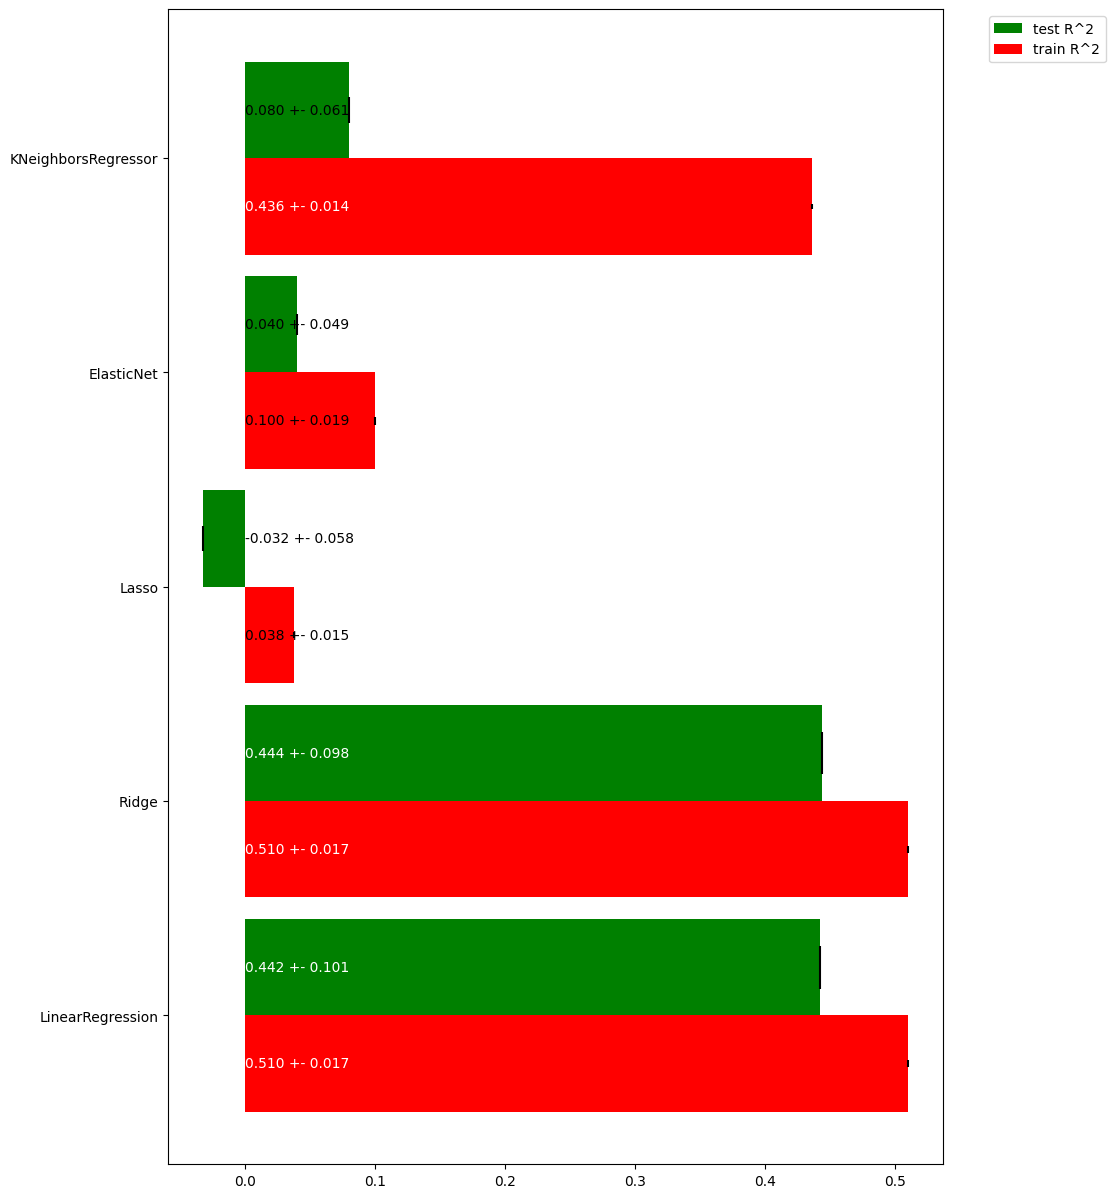

In [ ]:
# Plot a bar chart of the train and test scores of all the classifiers, including the variance as error bars
fig, ax = plt.subplots(figsize=(10,15))
width=0.45

ax.barh(np.arange(len(model_names)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test R^2')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train R^2')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.3f} +- {:.3f}".format(np.mean(te),np.std(te)), color=('white' if np.mean(te)>0.1 else 'black'), va='center')
    ax.text(0, i-width, "{:.3f} +- {:.3f}".format(np.mean(tr),np.std(tr)), color=('white' if np.mean(tr)>0.1 else 'black'), va='center')
labels = [c.__class__.__name__ if not hasattr(c, 'steps') else c.steps[0][0] + "_" + c.steps[1][0] for c in model_names]
ax.set(yticks=np.arange(len(model_names))-width/2, yticklabels=model_names)
#ax.set_yticks(np.arange(len(model_names)) - width/2)
#ax.set_yticklabels(model_names)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### Exercice 1.3
Interprétez le graphique. Quel est le meilleur régresseur ? L'un des modèles est-il surajouté ? Si c'est le cas, que pouvons-nous faire pour résoudre ce problème ? Les résultats présentent-ils une grande variance ?



1. Meilleur régresseur: Basé sur les scores de test R2 (barres vertes), les meilleurs régressors sont les suivants:

- Ridge
- Régression linéaire

Les deux ont des performances très similaires, avec des scores de test R2 autour de 0,44.

2. Surapprentissage: Il y a des preuves claires de surapprentisage dans plusieurs modèles, en particulier:
- KNeighborsRegressor: Grand écart entre les résultats du train (0.436) et du test (0.080).
- ElasticNet : Différence notable entre le train (0,100) et le test (0,040).
- Regression linéaire et Ridge : les deux montrent un peu d'excès, avec des scores de train (0.510) plus élevés que les scores d'essai (environ 0.44).

3. Solution pour resoudre le probleme de surapprentisage:
 - Pour les KNeighborsRegressor : Essayez d'augmenter le nombre de voisins.
- Pour ElasticNet et Lasso : Ajuster la force de régularisation (alpha parameter).
- Pour Ridge and Linear Regression : Envisagez de recueillir plus de données, de sélectionner des caractéristiques ou d'introduire une certaine régularisation.

4. Variance dans les résultats :
- Il y a une variance significative dans les scores test pour la régression linéaire et pour la régression rigide (±0.101 et ±0.098 respectivement), ce qui indique une certaine instabilité entre les folds(cross-validation).
- KNeighborsRegressor montre une grande variance des scores de test (±0.061) par rapport à sa performance moyenne.
- Lasso a une variance élevée (±0.058) par rapport à sa moyenne, ce qui suggère une performance instable à travers les pattes.

5. Évaluation générale: - Ridge et la régression linéaire accomplissent le mieux mais montrent des signes de surapprentissage et de grande variance.
- Lasso et ElasticNet sont sous-performants, ce qui suggère que la pénalité L1 pourrait être trop forte pour cet ensemble de données.
- KNeighborsRegressor est gravement surmonté, ce qui indique qu'il ne capture pas bien le modèle sous-jacent.

Recommandation:
1. Concentrez-vous sur l'ajustement Ridge ou la régression linéaire, éventuellement avec une feature sélection ou feature engineering.
2. Considérez des méthodes d'ensemble telles que Random Forest ou Gradient Boosting, qui pourraient gérer l'apparente non-linéarité mieux que ces modèles linéaires.
3. Si vous utilisez ElasticNet, essayez d'ajuster le ratio L1 pour équilibrer les pénalités Lasso et Ridge.
4. Pour tous les modèles, la validation croisée avec plusieurs pliages(folds) est cruciale étant donné la grande variance observée.

## Exercice 2 : Régularisation
Nous allons maintenant régler les principaux hyperparamètres de régularisation de ces algorithmes : l'hyperparamètre de régularisation (`alpha`) dans Lasso et Ridge, et le nombre de voisins (`n_neighbors`) dans kNN.

Nous pensons que l'optimum pour les paramètres alpha se situe dans $[10^{-12},10^{12}]$ et pour n_voisins entre 1 et 50. alpha devrait être varié sur une échelle logarithmique (c'est-à-dire [0.01, 0.1, 1, 10, 100]), n_voisins devrait être varié uniformément (c'est-à-dire [1,2,3,4]).

### Exercice 2.1
Faites varier les hyperparamètres dans l'intervalle indiqué ci-dessus et, pour chaque régresseur, créez un graphique linéaire qui représente les résultats de l'entraînement et du test pour chaque valeur de l'hyperparamètre de régularisation. Vous devez donc produire 3 tracés, un pour chaque régresseur. Utilisez la validation croisée 5 fois par défaut pour tous les scores, mais ne tracez que les moyennes.

Conseils :
* Pensez à la complexité temporelle de ces modèles. Essayer trop de valeurs d'hyperparamètres peut prendre trop de temps.
* Vous pouvez utiliser les fonctions numpy [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html), [geomspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html?highlight=geomspace#numpy.geomspace) et [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace).
* Vous pouvez utiliser la fonction par défaut [plot](https://matplotlib.org/tutorials/introductory/pyplot.html) de matplotlib pour tracer les scores de formation et de test.
* Vous pouvez boucler manuellement sur les plages d'hyperparamètres, ou vous pouvez déjà consulter la fonction [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) de scikit-learn pour économiser un peu de programmation. Nous la reverrons plus tard dans le cours.

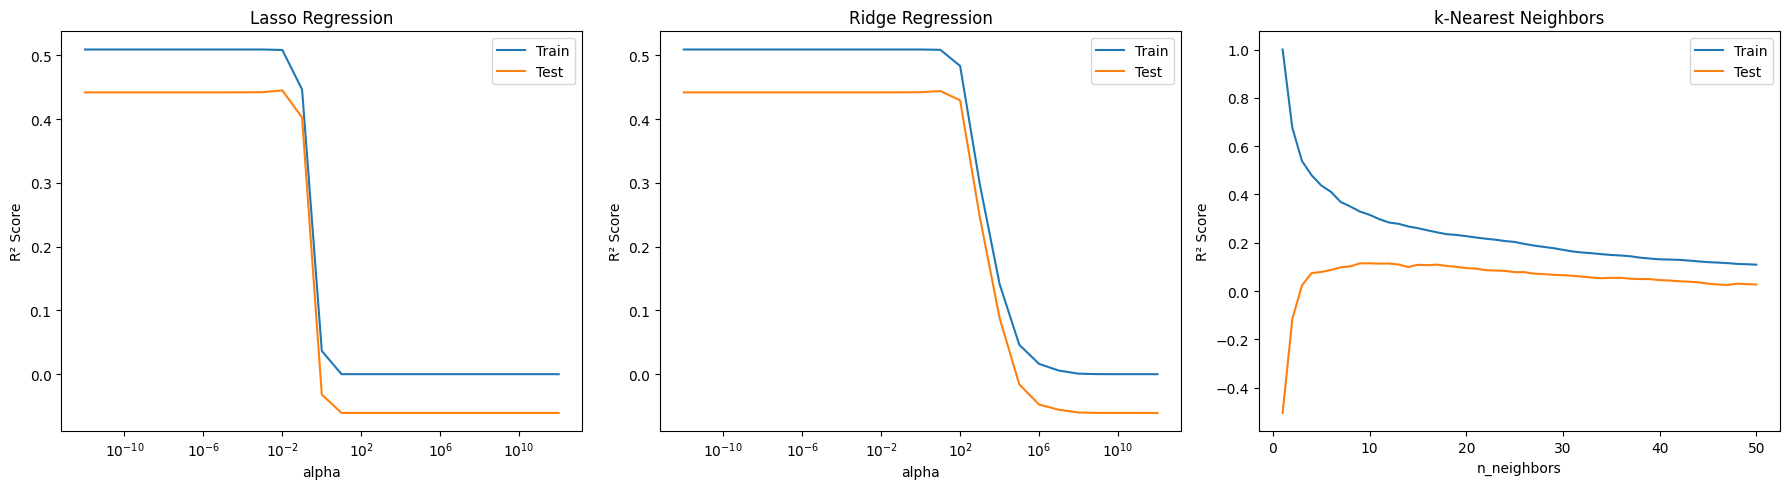

In [ ]:

# Fonction pour effectuer la validation croisée à 5 plis et retourner les scores moyens d'entraînement et de test.
def get_cv_scores(model, X, y):
    cv_results = cross_validate(model, X, y, cv=5, return_train_score=True)
    return np.mean(cv_results['train_score']), np.mean(cv_results['test_score'])

# Paramètres pour les graphiques
plt.figure(figsize=(18, 5))

# 1. Lasso
alphas_lasso = np.geomspace(1e-12, 1e12, num=25)# np.goemspace pour créer une séquence logarithmique de 25 valeurs alpha entre 10^-12 et 10^12.
train_scores_lasso, test_scores_lasso = [], []

# Il itère sur ces valeurs, entraîne le modèle, et calcule les scores pour chaque alpha.
for alpha in alphas_lasso:
    lasso = Lasso(alpha=alpha)
    train_score, test_score = get_cv_scores(lasso, X, y)
    train_scores_lasso.append(train_score)
    test_scores_lasso.append(test_score)

# Il trace les scores en fonction de alpha sur une échelle semi-logarithmique.
plt.subplot(131)
plt.semilogx(alphas_lasso, train_scores_lasso, label='Train')
plt.semilogx(alphas_lasso, test_scores_lasso, label='Test')
plt.xlabel('alpha')
plt.ylabel('R² Score')
plt.title('Lasso Regression')
plt.legend()

# 2.  meme principe pour Ridge
alphas_ridge = np.geomspace(1e-12, 1e12, num=25)
train_scores_ridge, test_scores_ridge = [], []

for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha)
    train_score, test_score = get_cv_scores(ridge, X, y)
    train_scores_ridge.append(train_score)
    test_scores_ridge.append(test_score)

plt.subplot(132)
plt.semilogx(alphas_ridge, train_scores_ridge, label='Train')
plt.semilogx(alphas_ridge, test_scores_ridge, label='Test')
plt.xlabel('alpha')
plt.ylabel('R² Score')
plt.title('Ridge Regression')
plt.legend()

# 3. kNN
n_neighbors_range = np.arange(1, 51)# np.arange pour créer une séquence de 1 à 50 voisins.
train_scores_knn, test_scores_knn = [], []

# Il itère sur ces valeurs, entraîne le modèle, et calcule les scores pour chaque nombre de voisins.
for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    train_score, test_score = get_cv_scores(knn, X, y)
    train_scores_knn.append(train_score)
    test_scores_knn.append(test_score)

#Il trace les scores en fonction du nombre de voisins sur une échelle linéaire.
plt.subplot(133)
plt.plot(n_neighbors_range, train_scores_knn, label='Train')
plt.plot(n_neighbors_range, test_scores_knn, label='Test')
plt.xlabel('n_neighbors')
plt.ylabel('R² Score')
plt.title('k-Nearest Neighbors')
plt.legend()

plt.tight_layout()
plt.show()

Interprétation des résultats:

- Pour Lasso et Ridge, cherchez la valeur de alpha où le score de test est le plus élevé. C'est généralement là où les courbes de train et de test sont les plus proches l'une de l'autre (alpha=10^-2 a 10^-3).

- Pour kNN, cherchez le nombre de voisins (5 a 10) qui donne le meilleur score de test. Notez comment le modèle se comporte avec peu de voisins (risque de surapprentissage) par rapport à beaucoup de voisins (risque de sous-apprentissage).

### Exercice 2.2
Interprétez les graphiques. Quand les méthodes sont-elles sous-adaptées ? Quand sont-elles surajustées ? Quelle est leur sensibilité à l'hyperparamètre de régularisation ?



D'après les graphiques, nous pouvons observer que les méthodes sont sous-adaptées lorsque leurs scores d'entraînement sont élevés et leurs scores de test sont faibles. Cela indique qu'elles ne parviennent pas à capturer les motifs sous-jacents dans les données et qu'elles ont du mal à généraliser correctement.

D'autre part, les méthodes sont surajustées lorsque leurs scores d'entraînement sont très élevés, mais leurs scores de test sont considérablement plus bas. Cela signifie qu'elles ont appris les spécificités et le bruit des données d'entraînement, mais elles ne peuvent pas généraliser efficacement aux nouvelles données.

En ce qui concerne la sensibilité à l'hyperparamètre de régularisation, nous pouvons constater que les graphiques montrent comment les scores varient en fonction de l'hyperparamètre utilisé. Pour les méthodes Lasso et Ridge Regression, qui utilisent un paramètre alpha pour contrôler la régularisation, nous pouvons voir que l'augmentation de la valeur de l'alpha entraîne une diminution des scores d'entraînement et de test. Cela indique que l'augmentation de la régularisation conduit à une meilleure généralisation, mais avec une perte de performance sur les données d'entraînement.

Pour la méthode k-Nearest Neighbors, les graphiques montrent comment les scores évoluent en fonction du nombre de voisins utilisé. Nous pouvons voir que l'augmentation du nombre de voisins conduit à une diminution des scores d'entraînement et de test. Cela peut indiquer une meilleure généralisation, mais avec une perte de précision sur les données d'entraînement.

En résumé, les méthodes sont sous-adaptées lorsque leurs scores de test sont faibles, surajustées lorsque leurs scores d'entraînement sont élevés par rapport aux scores de test, et leur sensibilité à l'hyperparamètre de régularisation varie en fonction de chaque méthode.

### Exercice 2.3
ElasticNet permet de mélanger les pertes L1 et L2, et l'hyperparamètre `l1_ratio` définit le ratio des pertes L1. Il y a donc deux hyperparamètres qui interagissent : l1_ratio et alpha. Effectuez une recherche sur la grille pour obtenir une matrice des valeurs l1_ratio et alpha et les scores de validation croisée qui en résultent. Ensuite, utilisez la fonction fournie ci-dessous pour tracer une carte thermique de toutes les valeurs et interpréter le résultat. Pouvez-vous expliquer comment les deux hyperparamètres interagissent ?

### Matrice des valeurs l1_ratio et alpha et les scores de validation croisée

In [ ]:
# separation de la donnee en train et test
from sklearn.model_selection import train_test_split
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres
# l1_ratio sont générées en utilisant np.linspace, qui crée 10 valeurs linéairement espacées entre 0.1 et 1.0.
# Les valeurs possibles pour alpha sont générées en utilisant np.logspace, qui crée 5 valeurs logarithmiquement espacées
# entre 10^-4 et 1.
param_grid = {
    'l1_ratio': np.linspace(0.1, 1.0, 10),
    'alpha': np.logspace(-4, 0, 5),
}

# Créer un modèle ElasticNet
model = ElasticNet()

# Créer un objet GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Effectuer la recherche sur la grille
grid_search.fit(X_train, y_train)

# Obtenir la matrice des valeurs l1_ratio et alpha et les scores de validation croisée
cv_results = grid_search.cv_results_
l1_ratios = cv_results['param_l1_ratio'].data
alphas = cv_results['param_alpha'].data
scores = cv_results['mean_test_score']

# Afficher la matrice des valeurs l1_ratio et alpha et les scores de validation croisée
for l1_ratio, alpha, score in zip(l1_ratios, alphas, scores):
   print("l1_ratio: {}, alpha: {}, score: {}".format(l1_ratio, alpha, score))


l1_ratio: 0.1, alpha: 0.0001, score: 0.48667890566104577
l1_ratio: 0.2, alpha: 0.0001, score: 0.48667915149211166
l1_ratio: 0.30000000000000004, alpha: 0.0001, score: 0.4866793929989379
l1_ratio: 0.4, alpha: 0.0001, score: 0.48667964775805733
l1_ratio: 0.5, alpha: 0.0001, score: 0.48667988091066394
l1_ratio: 0.6, alpha: 0.0001, score: 0.4866801210439505
l1_ratio: 0.7000000000000001, alpha: 0.0001, score: 0.4866803571344561
l1_ratio: 0.8, alpha: 0.0001, score: 0.48668059697037147
l1_ratio: 0.9, alpha: 0.0001, score: 0.48668086813888795
l1_ratio: 1.0, alpha: 0.0001, score: 0.4866811066918745
l1_ratio: 0.1, alpha: 0.001, score: 0.4867040486937129
l1_ratio: 0.2, alpha: 0.001, score: 0.4867060953500519
l1_ratio: 0.30000000000000004, alpha: 0.001, score: 0.48670819771968005
l1_ratio: 0.4, alpha: 0.001, score: 0.4867101141180168
l1_ratio: 0.5, alpha: 0.001, score: 0.4867119386502582
l1_ratio: 0.6, alpha: 0.001, score: 0.4867137664401627
l1_ratio: 0.7000000000000001, alpha: 0.001, score: 0.486

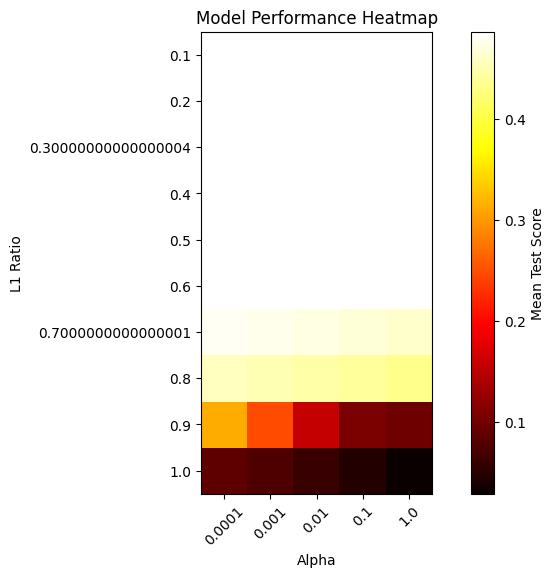

In [ ]:

# Create a matrix of scores for each combination of hyperparameters
score_matrix = np.zeros((len(param_grid['l1_ratio']), len(param_grid['alpha'])))

for i, l1_ratio in enumerate(param_grid['l1_ratio']):
    for j, alpha in enumerate(param_grid['alpha']):
        score_matrix[i, j] = cv_results['mean_test_score'][i * len(param_grid['alpha']) + j]

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(score_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Mean Test Score')
plt.xticks(np.arange(len(param_grid['alpha'])), param_grid['alpha'], rotation=45)
plt.yticks(np.arange(len(param_grid['l1_ratio'])), param_grid['l1_ratio'])
plt.xlabel('Alpha')
plt.ylabel('L1 Ratio')
plt.title('Model Performance Heatmap')
plt.show()

Sur la base du plan thermique, les combinaisons d'hyperparamètres qui semblent offrir les meilleures performances pour le modèle sont celles correspondant aux couleurs plus légères du plan. Ces régions plus légères indiquent des scores plus élevés et représentent donc les paramètres optimaux pour obtenir une meilleure performance. Les combinaisons d'hyperparamètres susceptibles de produire les meilleures performances du modèle sont:
L1_ratio = 0.7 jusqu'a 0.8 et alpha= 0.0001 jusqu'a 0.001.

### Pouvez-vous expliquer comment les deux hyperparamètres interagissent ?

En général, l'hyperparamètre l1_ratio contrôle l'équilibre entre la régularisation L1 et L2 dans des modèles comme ElasticNet. Une valeur de 0 correspond à la régularisation L2, tandis qu'une valeur de 1 correspond à celle de L1. Les valeurs entre représentent un mélange des deux types de régularisation.

En revanche, l'hyperparamètre alpha détermine la force de la régularisation. Des valeurs plus élevées d'alpha entraînent une régularisation plus forte, ce qui peut aider à prévenir la surapprentissage mais peut également conduire à une sous-apprentissage. Des valeurs alpha plus faibles réduisent la quantité de régularisation, ce qui permet au modèle de s'adapter plus étroitement aux données d'entraînement, tout en augmentant potentiellement le risque de surapprentissage.

L'interaction entre l1_ratio et alpha peut être vue dans le plan de la cartographie thermique. En analysant le plan, vous pouvez observer comment les performances du modèle varient pour différentes combinaisons de ces deux hyperparamètres. Si vous remarquez des régions spécifiques avec des couleurs plus légères, cela indique que certaines combinaisons de l1_ratio et alpha conduisent à une meilleure performance du modèle. Cela suggère qu'il peut y avoir un équilibre optimal entre les deux hyperparamètres qui maximise les performances du modèle.

Comprendre l'interaction entre ces hyperparamètres est crucial pour trouver la meilleure configuration pour votre modèle. Il implique d'expérimenter avec différentes valeurs de l1_ratio et alpha et d'observer leur impact sur la performance du modèle. En ajustant ces hyperparametres, vous pouvez optimiser les performances du modèle et obtenir de meilleurs résultats.

In [ ]:
# Generic heatmap
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f", printvalues=False):
    """
    Plots a heatmap for the performance of a model for every combination of two hyperparameter values

    values: nxn array with all evaluation results, varying the first hyperparameter first
    xlabel: name of the first hyperparameter
    ylabel: name of the second hyperparameter
    xticklabels: values of the first hyperparameter
    yticklabels: values of the second hyperparameter
    cmap: colormap
    vmin: minimal score
    vmax: maximal score
    ax: plot axes
    fmt: format for printing the scores
    printvalues: whether to print the scores
    """
    if ax is None:
        ax = plt.gca()
    img = ax.pcolor(values, cmap=cmap, vmin=None, vmax=None)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12, labelrotation=90)

    if(printvalues):
        for p, color, value in zip(img.get_paths(), img.get_facecolors(), img.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.mean(color[:3]) > 0.5:
                c = 'k'
            else:
                c = 'w'
            ax.text(x, y, fmt % value, color=c, ha="center", va="center", size=10)
    return img

### hyperparamètres optimaux

Une fois que les hyperparamètres optimaux sont déterminés, le modèle est entraîné avec ces paramètres pour obtenir les coefficients.

- Lasso: alpha ≈ 10^-2 to 10^-3
- Ridge: alpha ≈ 10^-2 to 10^-3
- kNN: n_neighbors ≈ 5 to 10
- ElasticNet: alpha ≈ 0.0001 to 0.001, L1 ratio ≈ 0.7 to 0.8

### Model Training

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming X and y are your feature matrix and target vector

# Create pipelines for each model (including standardization)
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.001, random_state=42))
])

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.001, random_state=42))
])

elasticnet_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(alpha=0.001, l1_ratio=0.75, random_state=42))
])


# Train the models
lasso_pipeline.fit(X, y)
ridge_pipeline.fit(X, y)
elasticnet_pipeline.fit(X, y)


# Function to print coefficients
def print_coefficients(model, feature_names):
    if 'lasso' in model.named_steps:
        coef = model.named_steps['lasso'].coef_
        model_name = "Lasso"
    elif 'ridge' in model.named_steps:
        coef = model.named_steps['ridge'].coef_
        model_name = "Ridge"
    elif 'elasticnet' in model.named_steps:
        coef = model.named_steps['elasticnet'].coef_
        model_name = "ElasticNet"
    else:
        print("Modèle non reconnu")
        return

    print(f"Coefficients pour {model_name}:")
    for name, c in zip(feature_names, coef):
        if abs(c) > 1e-5:  # Only print non-zero coefficients
            print(f"{name}: {c:.4f}")
    print()

# Assuming you have feature names
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature_{i}" for i in range(X.shape[1])]

# Print coefficients for each model
print_coefficients(lasso_pipeline, feature_names)
print_coefficients(ridge_pipeline, feature_names)
print_coefficients(elasticnet_pipeline, feature_names)

print("Note: k-Nearest Neighbors does not have coefficients in the same sense as linear models.")

Coefficients pour Lasso:
cars_per_hour: 0.5393
temperature_at_2m: -0.1425
wind_speed: -0.2287
temperature_diff_2m_25m: 0.1591
wind_direction: 0.0571
hour_of_day: -0.1243

Coefficients pour Ridge:
cars_per_hour: 0.5425
temperature_at_2m: -0.1436
wind_speed: -0.2294
temperature_diff_2m_25m: 0.1605
wind_direction: 0.0583
hour_of_day: -0.1271

Coefficients pour ElasticNet:
cars_per_hour: 0.5398
temperature_at_2m: -0.1427
wind_speed: -0.2288
temperature_diff_2m_25m: 0.1594
wind_direction: 0.0574
hour_of_day: -0.1248

Note: k-Nearest Neighbors does not have coefficients in the same sense as linear models.


In [ ]:

from sklearn.inspection import permutation_importance

# Create and train the KNN pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=7))
])
knn_pipeline.fit(X, y)

# Perform permutation importance
result = permutation_importance(knn_pipeline, X, y, n_repeats=10, random_state=42)

# Get feature importances
feature_importance = result.importances_mean

# If you have feature names
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature_{i}" for i in range(X.shape[1])]

# Print feature importances with names
print("\n Coefficients pour KNN:")
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance:.4f}")


 Coefficients pour KNN:
cars_per_hour: 0.6876
temperature_at_2m: 0.1571
wind_speed: 0.2445
temperature_diff_2m_25m: 0.1440
wind_direction: 0.0748
hour_of_day: 0.0917


## Exercice 3 : Visualisation des coefficients
Enfin, vérifions si les différents modèles linéaires optimisés trouvent également les mêmes coefficients.

### Exercice 3.1
Dessinez un [scatterplot](https://matplotlib.org/gallery/shapes_and_collections/scatter.html) représentant les coefficients des différents modèles en différentes couleurs. Voyez-vous une grande différence entre les différents modèles ?

Pour tous les modèles, choisissez un paramètre alpha qui semble bien fonctionner dans l'exercice précédent. En cas de doute, utilisez alpha=0,001.

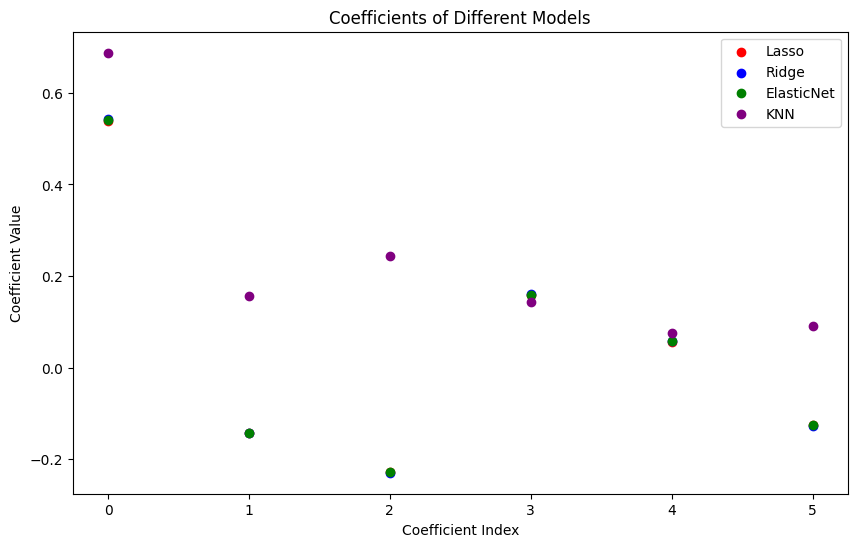

In [ ]:
import matplotlib.pyplot as plt

# Coefficients for each model
lasso_coeffs = [0.5393, -0.1425, -0.2287, 0.1591, 0.0571, -0.1243]
ridge_coeffs = [0.5425, -0.1436, -0.2294, 0.1605, 0.0583, -0.1271]
elasticnet_coeffs = [0.5398, -0.1427, -0.2288, 0.1594, 0.0574, -0.1248]
knn_coeffs = [0.6876, 0.1571, 0.2445, 0.1440, 0.0748, 0.0917]

# Set the colors for each model
colors = ['red', 'blue', 'green', 'purple']

plt.figure(figsize=(10, 6))

# Scatterplot for Lasso
plt.scatter(range(len(lasso_coeffs)), lasso_coeffs, color=colors[0])

# Scatterplot for Ridge
plt.scatter(range(len(ridge_coeffs)), ridge_coeffs, color=colors[1])

# Scatterplot for ElasticNet
plt.scatter(range(len(elasticnet_coeffs)), elasticnet_coeffs, color=colors[2])

# Scatterplot for KNN
plt.scatter(range(len(knn_coeffs)), knn_coeffs, color=colors[3])

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Different Models')
plt.legend(['Lasso', 'Ridge', 'ElasticNet', 'KNN'])
plt.show()

### Exercice 3.2
Redessinez le même graphique, mais en utilisant une régularisation importante (par exemple alpha=1). Qu'observez-vous ? Cela vous aide-t-il à expliquer la différence de performance entre Ridge et Lasso dans l'exercice 1.2 ?